#                             1.6 million UK traffic accidents

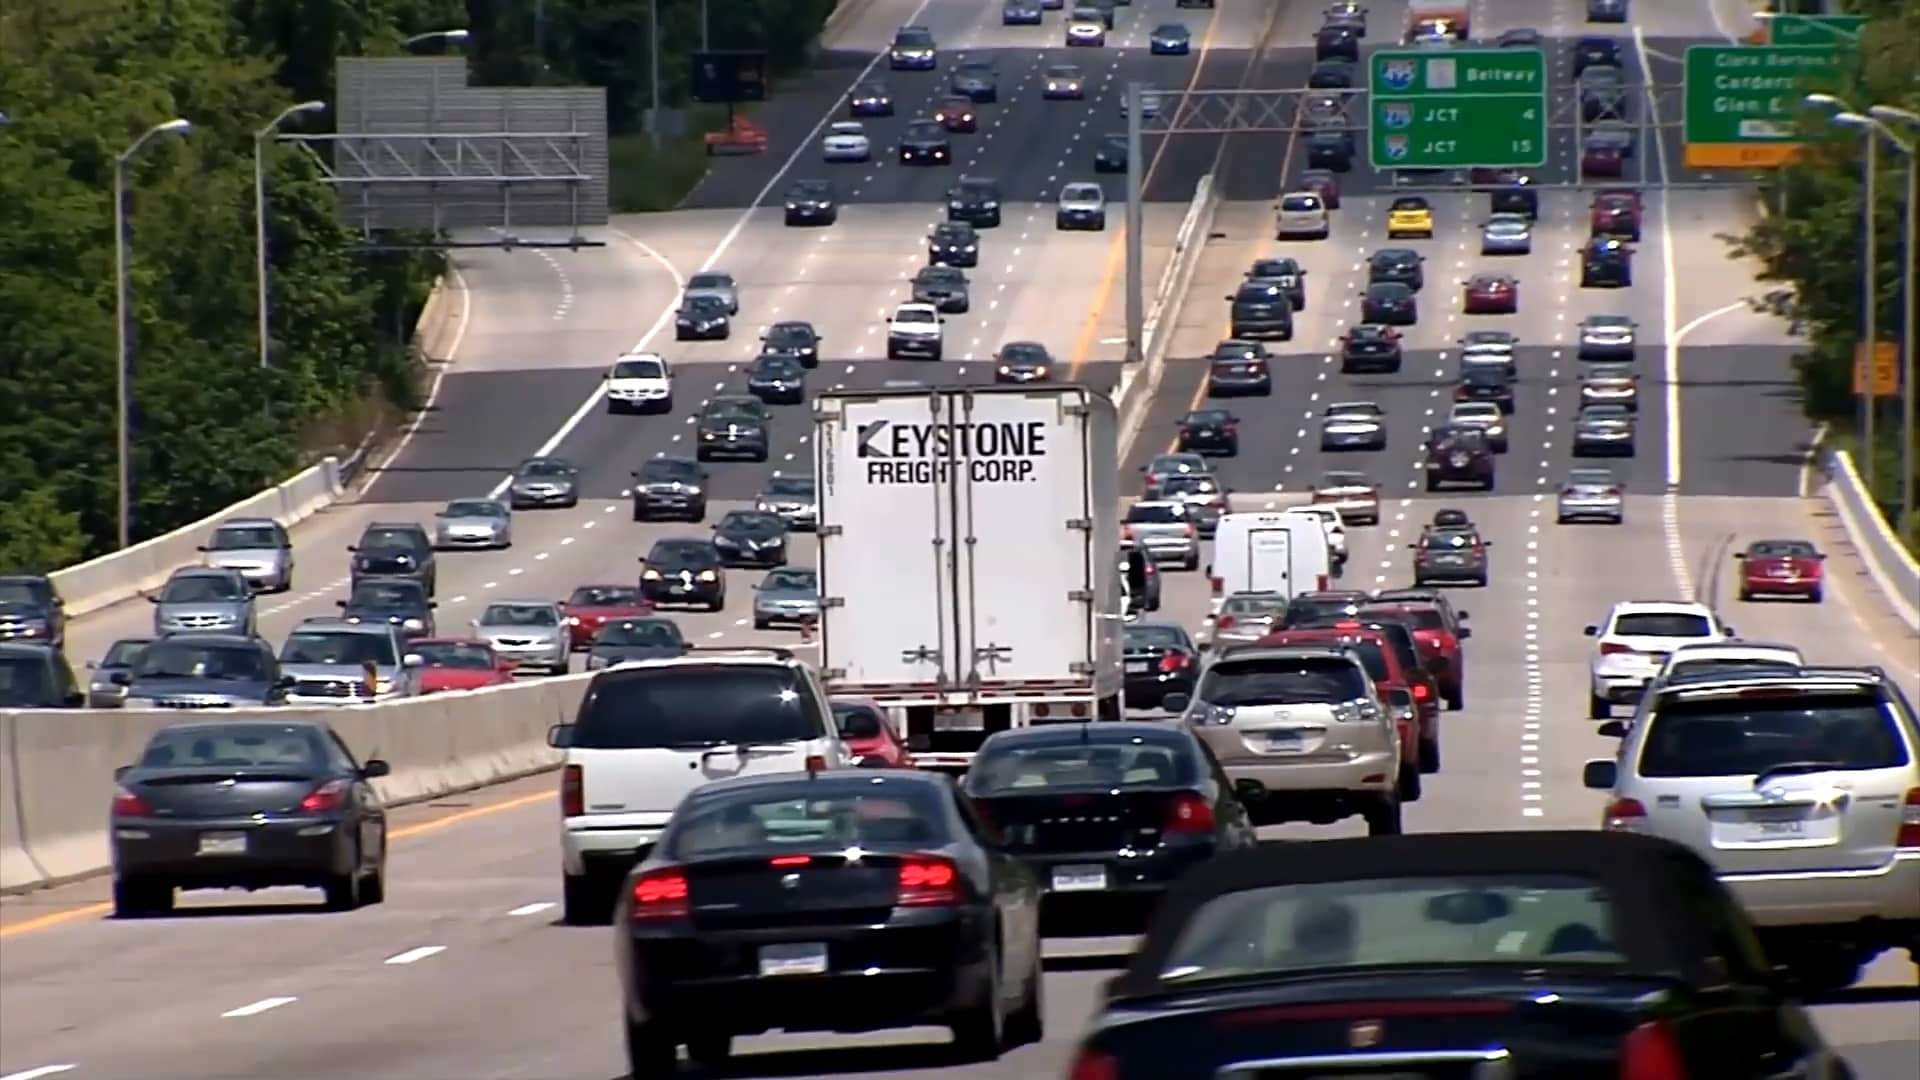

CONTEXT

The UK government amassed traffic data from 2000 and 2016, recording over 1.6 million accidents in the process and making this one of the most comprehensive traffic data sets out there. It's a huge picture of a country undergoing change.

Note that all the contained accident data comes from police reports, so this data does not include minor incidents.




CONTENT

ukTrafficAADF.csv tracks how much traffic there was on all major roads in the given time period (2000 through 2016). AADT, the core statistic included in this file, stands for "Average Annual Daily Flow", and is a measure of how activity a road segment based on how many vehicle trips traverse it. The AADT page on Wikipedia is a good reference on the subject.

Accidents data is split across three CSV files: accidents_2005_to_2007.csv, accidents_2009_to_2011.csv, and accidents_2012_to_2014.csv. These three files together constitute 1.6 million traffic accidents. The total time period is 2005 through 2014, but 2008 is missing.

We will try to answer following questions in this work,

- When do accidents generally happen?

- What kind of street or highways are more likely to have accidents?

- Does wather/road condition have any impact on accidents?




In [1]:
# Importing libraries that will be used in our work,


import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the data into our notebook,

accidents_2005_to_2007 = pd.read_csv('accidents_2005_to_2007.csv', low_memory=False)
accidents_2009_to_2011 = pd.read_csv('accidents_2009_to_2011.csv', low_memory=False)
accidents_2012_to_2014 = pd.read_csv('accidents_2012_to_2014.csv', low_memory=False)


df_traffic = pd.read_csv('ukTrafficAADF.csv', low_memory=False)

# DATA PREPARATION

In [3]:
accidents_2005_to_2007.head() 

Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                178240.0  -0.191170   
1  200501BS00002               524170.0                181650.0  -0.211708   
2  200501BS00003               524520.0                182240.0  -0.206458   
3  200501BS00004               526900.0                177530.0  -0.173862   
4  200501BS00005               528060.0                179040.0  -0.156618   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.489096             1                  2                   1   
1  51.520075             1                  3                   1   
2  51.525301             1                  3                   2   
3  51.482442             1                  3                   1   
4  51.495752             1                  3                   1   

   Number_of_Casualties        Date  ...  \
0                     1  04/01/2005  ...   
1                     1  05/01/2005  ...   
2                     1  06/01/2005  ...   
3                     1  07/01/2005  ...   
4                     1  10/01/2005  ...   

       Pedestrian_Crossing-Physical_Facilities  \
0                               Zebra crossing   
1  Pedestrian phase at traffic signal junction   
2        No physical crossing within 50 meters   
3        No physical crossing within 50 meters   
4        No physical crossing within 50 meters   

                          Light_Conditions          Weather_Conditions  \
0           Daylight: Street light present  Raining without high winds   
1  Darkness: Street lights present and lit     Fine without high winds   
2  Darkness: Street lights present and lit     Fine without high winds   
3           Daylight: Street light present     Fine without high winds   
4        Darkness: Street lighting unknown     Fine without high winds   

  Road_Surface_Conditions  Special_Conditions_at_Site  Carriageway_Hazards  \
0                Wet/Damp                        None                 None   
1                     Dry                        None                 None   
2                     Dry                        None                 None   
3                     Dry                        None                 None   
4                Wet/Damp                        None                 None   

  Urban_or_Rural_Area  Did_Police_Officer_Attend_Scene_of_Accident  \
0                   1                                          Yes   
1                   1                                          Yes   
2                   1                                          Yes   
3                   1                                          Yes   
4                   1                                          Yes   

   LSOA_of_Accident_Location  Year  
0                  E01002849  2005  
1                  E01002909  2005  
2                  E01002857  2005  
3                  E01002840  2005  
4                  E01002863  2005  

[5 rows x 33 columns]

In [4]:
df_traffic.head()

AADFYear    CP Estimation_method Estimation_method_detailed  \
0      2000  6007           Counted               Manual count   
1      2000  6009           Counted               Manual count   
2      2000  6035           Counted               Manual count   
3      2000  6054           Counted               Manual count   
4      2000  6055           Counted               Manual count   

                     Region LocalAuthority  Road RoadCategory  Easting  \
0  Yorkshire and the Humber      Rotherham    M1           TM   446000   
1  Yorkshire and the Humber          Leeds  M621           TM   432150   
2  Yorkshire and the Humber      Doncaster   M18           TM   466400   
3  Yorkshire and the Humber     Calderdale   M62           TM   404000   
4  Yorkshire and the Humber          Leeds   M62           TM   426000   

   Northing  ... V2AxleRigidHGV V3AxleRigidHGV  V4or5AxleRigidHGV  \
0    389300  ...           5351            656                711   
1    429500  ...           1293            272                287   
2    407900  ...           1952            257                239   
3    416600  ...           3121            508                354   
4    426200  ...           4030            624                423   

   V3or4AxleArticHGV  V5AxleArticHGV  V6orMoreAxleArticHGV  AllHGVs  \
0               1588            4715                  2149    15170   
1                628            1494                   921     4895   
2                745            3695                  2000     8888   
3               1786            5902                  3438    15109   
4               1947            6669                  3743    17436   

   AllMotorVehicles        Lat       Lon  
0            111146  53.398531 -1.309655  
1             65939  53.760869 -1.513814  
2             40229  53.563523 -0.998970  
3             85759  53.645893 -1.940967  
4             98487  53.731551 -1.607374  

[5 rows x 29 columns]

In [5]:
accidents_2005_to_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570011 entries, 0 to 570010
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               570011 non-null  object 
 1   Location_Easting_OSGR                        569910 non-null  float64
 2   Location_Northing_OSGR                       569910 non-null  float64
 3   Longitude                                    569910 non-null  float64
 4   Latitude                                     569910 non-null  float64
 5   Police_Force                                 570011 non-null  int64  
 6   Accident_Severity                            570011 non-null  int64  
 7   Number_of_Vehicles                           570011 non-null  int64  
 8   Number_of_Casualties                         570011 non-null  int64  
 9   Date                                         570011 non-nul

In [6]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275385 entries, 0 to 275384
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AADFYear                    275385 non-null  int64  
 1   CP                          275385 non-null  int64  
 2   Estimation_method           237812 non-null  object 
 3   Estimation_method_detailed  237812 non-null  object 
 4   Region                      275385 non-null  object 
 5   LocalAuthority              275385 non-null  object 
 6   Road                        275385 non-null  object 
 7   RoadCategory                275385 non-null  object 
 8   Easting                     275385 non-null  int64  
 9   Northing                    275385 non-null  int64  
 10  StartJunction               275129 non-null  object 
 11  EndJunction                 275147 non-null  object 
 12  LinkLength_km               275385 non-null  float64
 13  LinkLength_mil

In [7]:
print(accidents_2005_to_2007.shape)
print(accidents_2009_to_2011.shape)
print(accidents_2012_to_2014.shape)

(570011, 33)
(469442, 33)
(464697, 33)


In [8]:
#Dropping duplicated values in each accidents table,and concatinating them,

accidents_2005_to_2007_no_duplicates = accidents_2005_to_2007.drop_duplicates()
accidents_2009_to_2011_no_duplicates = accidents_2009_to_2011.drop_duplicates()
accidents_2012_to_2014_no_duplicates = accidents_2012_to_2014.drop_duplicates()

print(accidents_2005_to_2007_no_duplicates.shape)
print(accidents_2009_to_2011_no_duplicates.shape)
print(accidents_2012_to_2014_no_duplicates.shape)


accidents_concatenated = pd.concat([accidents_2005_to_2007_no_duplicates, accidents_2009_to_2011_no_duplicates ,accidents_2012_to_2014_no_duplicates])

accidents_concatenated = accidents_concatenated.reset_index(drop=True)

accidents_concatenated = accidents_concatenated.drop_duplicates()


(570008, 33)
(469437, 33)
(430550, 33)


In [9]:
accidents_concatenated.shape

(1469995, 33)

In [10]:
#I want to drop the columns that have more than fourty percent of their values as null,

null_percentage = accidents_concatenated.isnull().sum() / len(accidents_concatenated)
cols_to_drop = null_percentage[null_percentage > 0.4].index
cols_to_drop

Index(['Junction_Detail', 'Junction_Control'], dtype='object')

In [11]:
accidents = accidents_concatenated.drop(cols_to_drop, axis=1)
accidents.shape

(1469995, 31)

# LOCATION

#### What are the regions or areas with most frequent accidents?

In [12]:
x = accidents[["Latitude","Longitude"]].dropna()

sample = x.sample(n=10000)

import folium

m = folium.Map(location=(55.1067, -3.348426), zoom_start=8)

for idx,row  in sample.iterrows():
    
    folium.CircleMarker(location=(row.Latitude,row.Longitude), radius=2).add_to(m)
    
m

According to our sample that is taken from accidents data,we can see that most of the accidents happened locally within cities instead on highways. It could be the reason of the traffic is more congested locally than on highways.

# TIME/DAY

#### Do accidents generally happen more often on weekdays or weekends?

In [14]:
accidents["Day_of_Week"].unique()

array([3, 4, 5, 6, 2, 7, 1], dtype=int64)

In [15]:
counts_days = accidents["Day_of_Week"].value_counts()
print(counts_days)

6    241596
4    221189
5    221066
3    219026
2    208857
7    196944
1    161317
Name: Day_of_Week, dtype: int64


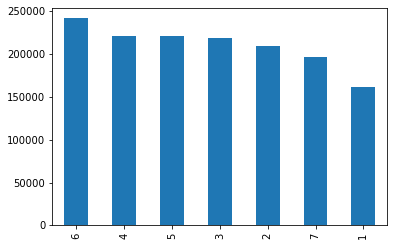

In [16]:
counts_days.plot(kind='bar')
plt.show()

We see that amount of accidents that have happened in sunday is greater than others whereas there is no big difference between tuesday,wednesday,friday, and thursday.And the amount of accidents that happened in monday is less compared to others.

#### At what time of the day do accidents generally happen?

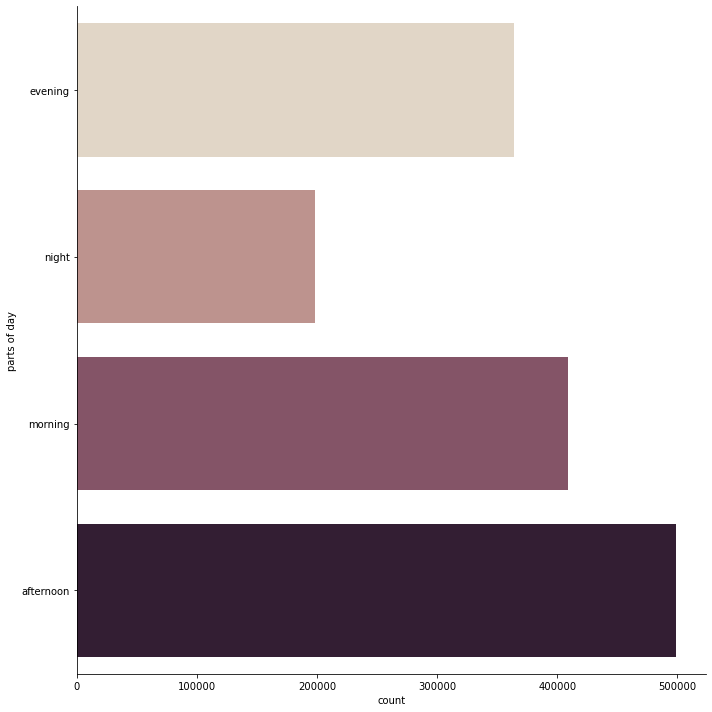

In [17]:
# Here I will split the day into four category namely morning(06:00-12:00),afternoon(12:00-17:00),evening(17:00-21:00),night(21:00-06:00)
# and count the data based on those categories.

hours_of_day_list = []

for i in accidents["Time"]:
  if type(i) == str:
    hours_of_day_list.append(int(i[:2]))


parts_of_day_list = []

for i in hours_of_day_list:
  
  if i in range(6,12):
    parts_of_day_list.append("morning")
  
  elif i in range(12,17):
    parts_of_day_list.append("afternoon")
  
  elif i in range(17,21):
    parts_of_day_list.append("evening")
  
  else:
    parts_of_day_list.append("night")

parts_of_day_df = pd.DataFrame(parts_of_day_list, columns=["parts of day"])

parts_of_day_df.head()


count_parts_of_day = parts_of_day_df.value_counts()

sns.catplot(data = parts_of_day_df, x = None, y = "parts of day", kind="count", palette="ch:.25", size = 10)


#### Here are the amount of accidents per year...

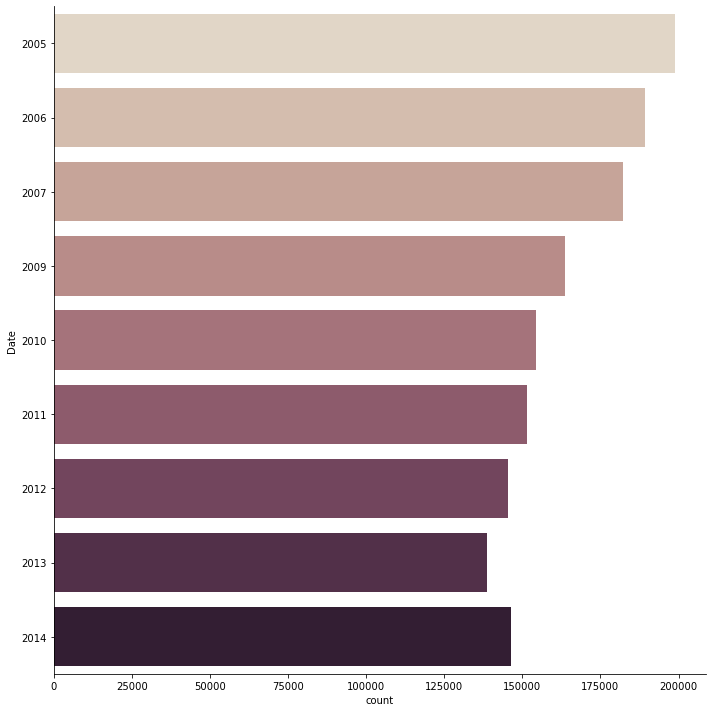

In [18]:
accidents_year = pd.DatetimeIndex(accidents["Date"]).year
accidents_year = pd.DataFrame(accidents_year)

display(sns.catplot(data = accidents_year, x = None, y = "Date", kind="count", palette="ch:.25", size=10))


We see that amount of accidents that happened decreases as we go from 2005 to 2011.

# ROAD/WEATHER CONDITION

#### Does the condition of surface of the road have an impact on the occurrence of accidents?

In [19]:
accidents["Road_Surface_Conditions"].unique()

array(['Wet/Damp', 'Dry', 'Frost/Ice', 'Snow',
       'Flood (Over 3cm of water)', nan], dtype=object)

In [20]:
counts_road_types = accidents["Road_Surface_Conditions"].value_counts()
counts_road_types

Dry                          1011518
Wet/Damp                      413464
Frost/Ice                      30656
Snow                           10343
Flood (Over 3cm of water)       2069
Name: Road_Surface_Conditions, dtype: int64

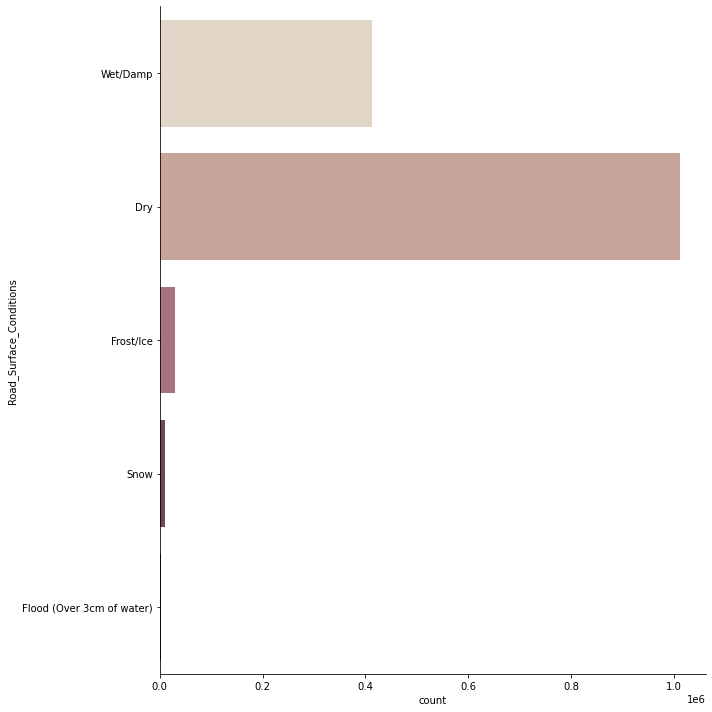

In [21]:
sns.catplot(data = accidents, x = None, y = "Road_Surface_Conditions", kind="count", palette="ch:.25", size=10)

We see that most of the accidents have happened when road is dry.
One can easily ask that why the amount of accidents that have happened on a road that is not dry is less than when it is dry.
And my answer for that is ;
Because drivers are extra focused and careful when road conditions are out of "normal" and that attitude drives them to pay attention at "driving carefully"
which yields less accident happening.
And additionally this explanation holds for whether condition too,let's verify ourselves...

In [22]:
accidents["Weather_Conditions"].unique()

array(['Raining without high winds', 'Fine without high winds', 'Unknown',
       'Snowing without high winds', 'Other', 'Fine with high winds',
       'Raining with high winds', 'Fog or mist',
       'Snowing with high winds', nan], dtype=object)

In [23]:
counts_whether = accidents["Weather_Conditions"].value_counts()
counts_whether

Fine without high winds       1176672
Raining without high winds     172946
Other                           32914
Unknown                         27749
Raining with high winds         20360
Fine with high winds            18099
Snowing without high winds      11141
Fog or mist                      8055
Snowing with high winds          1933
Name: Weather_Conditions, dtype: int64

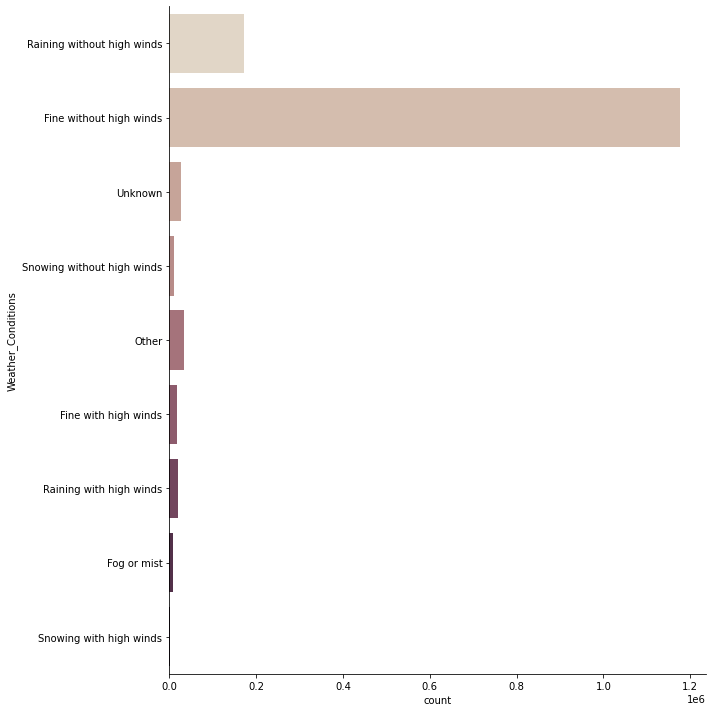

In [24]:
sns.catplot(data = accidents, x = None, y = "Weather_Conditions", kind="count", palette="ch:.25", size=10)

#### Now let's deal with ukTrafficAADF data;

In [37]:
df_traffic.describe()

AADFYear             CP        Easting      Northing  \
count  275385.000000  275385.000000  275385.000000  2.753850e+05   
mean     2007.967907   47277.490437  425675.250780  3.561826e+05   
std         4.862875   27004.889605   98687.570954  1.869923e+05   
min      2000.000000      60.000000   69987.000000  7.625000e+04   
25%      2004.000000   26218.000000  352970.000000  1.921200e+05   
50%      2008.000000   47252.000000  430000.000000  3.240000e+05   
75%      2012.000000   74392.000000  510600.000000  4.296000e+05   
max      2016.000000   99967.000000  655040.000000  1.205400e+06   

       LinkLength_km  LinkLength_miles    PedalCycles    Motorcycles  \
count  275385.000000     275385.000000  275385.000000  275385.000000   
mean        2.757116          1.712899     123.314654     222.099297   
std         3.815569          2.371086     421.440798     420.874069   
min         0.070000          0.040000       0.000000       0.000000   
25%         0.600000          0.370000       5.000000      58.000000   
50%         1.400000          0.870000      26.000000     113.000000   
75%         3.200000          1.990000      83.000000     214.000000   
max        55.500000         34.490000   18629.000000    9815.000000   

           CarsTaxis   BusesCoaches  ...  V2AxleRigidHGV  V3AxleRigidHGV  \
count  275385.000000  275385.000000  ...   275385.000000   275385.000000   
mean    16813.332923     248.662175  ...      489.379193       83.551450   
std     16618.266842     374.650774  ...      683.713666      121.773472   
min         0.000000       0.000000  ...        0.000000        0.000000   
25%      7125.000000      60.000000  ...      148.000000       24.000000   
50%     12255.000000     127.000000  ...      273.000000       46.000000   
75%     19951.000000     280.000000  ...      517.000000       91.000000   
max    207133.000000   11359.000000  ...    10942.000000     5968.000000   

       V4or5AxleRigidHGV  V3or4AxleArticHGV  V5AxleArticHGV  \
count      275385.000000      275385.000000   275385.000000   
mean           88.924513          74.249433      247.927389   
std           142.005359         183.767833      752.311296   
min             0.000000           0.000000        0.000000   
25%            15.000000           7.000000        9.000000   
50%            41.000000          20.000000       34.000000   
75%           100.000000          56.000000      125.000000   
max          3684.000000        3949.000000    11034.000000   

       V6orMoreAxleArticHGV        AllHGVs  AllMotorVehicles            Lat  \
count         275385.000000  275385.000000     275385.000000  275385.000000   
mean             271.747354    1255.774163      21152.693542      53.092936   
std              835.966781    2446.175298      21536.689989       1.681459   
min                0.000000       0.000000          0.000000      50.583853   
25%               10.000000     252.000000       8941.000000      51.614977   
50%               37.000000     489.000000      15143.000000      52.807705   
75%              137.000000    1041.000000      24660.000000      53.760638   
max            13758.000000   27095.000000     262842.000000      60.727231   

                 Lon  
count  275385.000000  
mean       -1.654634  
std         1.478250  
min        -7.442680  
25%        -2.711540  
50%        -1.549475  
75%        -0.389834  
max         1.754553  

[8 rows x 21 columns]

In [38]:
df_traffic.isnull().any()

AADFYear                      False
CP                            False
Estimation_method              True
Estimation_method_detailed     True
Region                        False
LocalAuthority                False
Road                          False
RoadCategory                  False
Easting                       False
Northing                      False
StartJunction                  True
EndJunction                    True
LinkLength_km                 False
LinkLength_miles              False
PedalCycles                   False
Motorcycles                   False
CarsTaxis                     False
BusesCoaches                  False
LightGoodsVehicles            False
V2AxleRigidHGV                False
V3AxleRigidHGV                False
V4or5AxleRigidHGV             False
V3or4AxleArticHGV             False
V5AxleArticHGV                False
V6orMoreAxleArticHGV          False
AllHGVs                       False
AllMotorVehicles              False
Lat                         

We see some columns including null values.

AADT statistic plays an important role here,it stands for a measure of how active a road segment is.Now we will try to make a model,namely Linear Regression model,to predict this quantity based on other columns.

In [39]:
df = df_traffic.dropna() #We drop the rows that include null values.

X = df.loc[:,"LinkLength_km":'V6orMoreAxleArticHGV']

y_regression = df["AllMotorVehicles"]

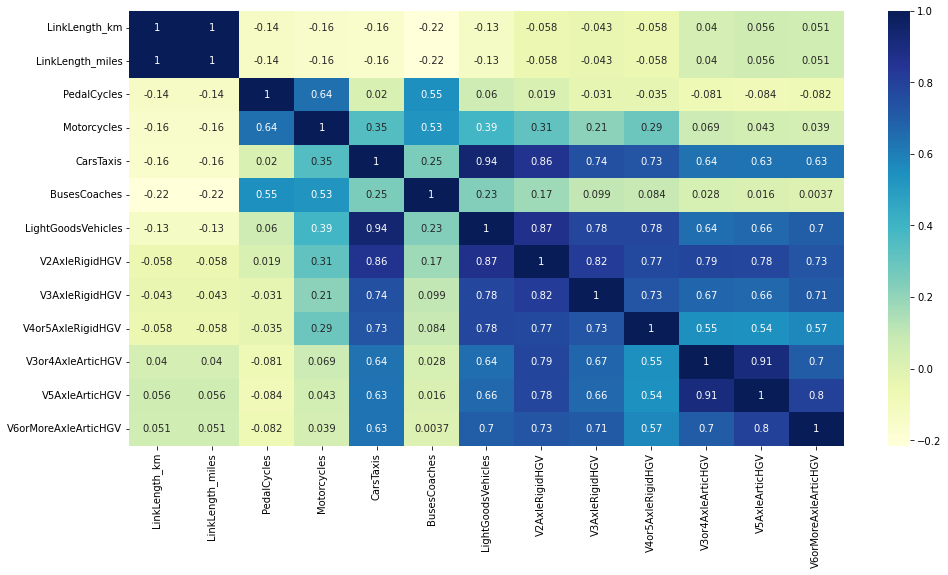

In [40]:
plt.figure(figsize=(16,8))

sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)

plt.show()

We see some collinearity issue,to deal with the problem,we will use VIF(Variance Inflation Factor)

In [41]:
#I will remove some columns from X to deal with multicollinearity,

X = X.drop(["V5AxleArticHGV","V3or4AxleArticHGV","V2AxleRigidHGV"], axis=1)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                feature           VIF
0         LinkLength_km  1.058900e+06
1      LinkLength_miles  1.058842e+06
2           PedalCycles  2.345251e+00
3           Motorcycles  3.088010e+00
4             CarsTaxis  1.777725e+01
5          BusesCoaches  2.303064e+00
6    LightGoodsVehicles  2.405745e+01
7        V3AxleRigidHGV  4.789965e+00
8     V4or5AxleRigidHGV  4.043674e+00
9  V6orMoreAxleArticHGV  2.710515e+00


After dropping columns that had more than 5 vif value,I can say that we are okey now.

In [43]:
X.head()

LinkLength_km  LinkLength_miles  PedalCycles  Motorcycles  CarsTaxis  \
0            3.8              2.36            0          168      81418   
1            1.9              1.18            0          196      52479   
2            6.5              4.04            0           25      26170   
3            6.0              3.73            0          130      58960   
4            4.9              3.04            0          229      68722   

   BusesCoaches  LightGoodsVehicles  V3AxleRigidHGV  V4or5AxleRigidHGV  \
0           440               13950             656                711   
1           291                8078             272                287   
2           129                5017             257                239   
3           319               11241             508                354   
4           282               11818             624                423   

   V6orMoreAxleArticHGV  
0                  2149  
1                   921  
2                  2000  
3                  3438  
4                  3743

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_regression, test_size=0.33, random_state=42)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X,y_regression)

# make predictions on the test set
predictions = model.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

# calculate the root mean squared error
rmse = np.sqrt(mse)

# calculate the R-squared value
r2 = r2_score(y_test, predictions)

print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared:', r2)

MSE: 482354.0815524568
RMSE: 694.5171571332538
R-squared: 0.9988809236687918


For now we are done here,but for those who wanna deal with this data/notebook more,I would recommend them to implement some 
classification algorithms such as logistic regression for predicting some columns in  ukTrafficAADF  data frame such as RoadCategory.